DATA COLLECTION

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [ ]:
!kaggle datasets download -d toaharahmanratul/acrima-dataset

 79% 18.0M/22.9M [00:00<00:00, 183MB/s]
100% 22.9M/22.9M [00:00<00:00, 197MB/s]


In [ ]:
!unzip \*.zip && rm *.zip

Archive:  acrima-dataset.zip
replace test/Glaucoma/Im322_g_ACRIMA.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import cv2
import numpy as np
import os

DATA PREPROCESSING

In [ ]:
# Define the directory containing the images
data_dir = '/content/train'

# Define the output directory for preprocessed images
output_dir = '/content/train/Glaucoma/Im312_g_ACRIMA.jpg'

# Create the output directory if it doesn't exist89ooooo
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Define a function for preprocessing images
def preprocess_image(image_path, output_path):
    # Read the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply histogram equalization to improve contrast
    equalized = cv2.equalizeHist(gray)

    # Resize the image to a fixed size (e.g., 224x224)
    resized = cv2.resize(equalized, (224, 224))

    # Save the preprocessed image
    cv2.imwrite(output_path, resized)

# Iterate through the images in the data directory
for filename in os.listdir(data_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Preprocess the image
        image_path = os.path.join(data_dir, filename)
        output_path = os.path.join(output_dir, filename)
        preprocess_image(image_path, output_path)

print("Preprocessing complete.")

Preprocessing complete.


DATA SEGMENTATION

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2)  # Splitting the data into training and validation sets

train_generator = train_datagen.flow_from_directory(
    '/content/train',
    target_size=(224, 224),  # Adjust target size as needed
    batch_size=32,
    class_mode='categorical',
     subset='training')

validation_generator = train_datagen.flow_from_directory(
    '/content/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

Found 453 images belonging to 2 classes.
Found 112 images belonging to 2 classes.


DNN MODEL

In [ ]:
# DNN model architecture
model = Sequential([
    Flatten(input_shape=(224, 224, 3)),  # Flatten the input image dimensions
    Dense(128, activation='relu'),       # 128 neuron hidden layer with ReLU activation
    Dense(64, activation='relu'),        # 64 neuron hidden layer with ReLU activation
    Dense(2, activation='softmax')       # Output layer with softmax activation for 2 classes
])

# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=20)

Epoch 1/20
14/14 [==============================] - 9s 500ms/step - loss: 21.3511 - accuracy: 0.5083 - val_loss: 28.7625 - val_accuracy: 0.5938
Epoch 2/20
14/14 [==============================] - 8s 557ms/step - loss: 8.7995 - accuracy: 0.6580 - val_loss: 1.3766 - val_accuracy: 0.8229
Epoch 3/20
14/14 [==============================] - 6s 438ms/step - loss: 2.5522 - accuracy: 0.7316 - val_loss: 2.9104 - val_accuracy: 0.6875
Epoch 4/20
14/14 [==============================] - 6s 439ms/step - loss: 1.2123 - accuracy: 0.7886 - val_loss: 0.3292 - val_accuracy: 0.9167
Epoch 5/20
14/14 [==============================] - 7s 488ms/step - loss: 0.5758 - accuracy: 0.8480 - val_loss: 0.3025 - val_accuracy: 0.9375
Epoch 6/20
14/14 [==============================] - 7s 531ms/step - loss: 0.9685 - accuracy: 0.8029 - val_loss: 0.9050 - val_accuracy: 0.7083
Epoch 7/20
14/14 [==============================] - 6s 439ms/step - loss: 0.3809 - accuracy: 0.8812 - val_loss: 1.0444 - val_accuracy: 0.7188
Epoc

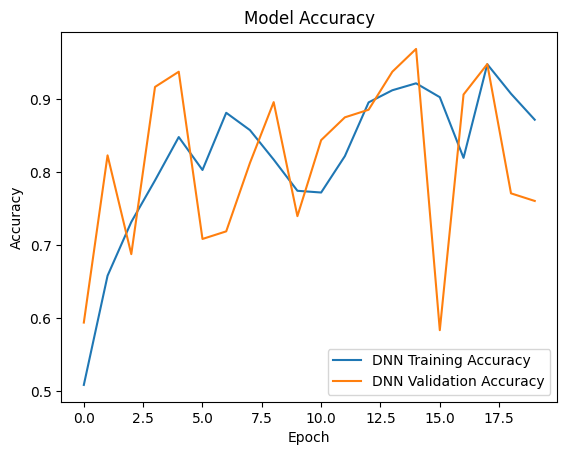

In [ ]:
import matplotlib.pyplot as plt
# Plot accuracy graph
plt.plot(history.history['accuracy'], label='DNN Training Accuracy')
plt.plot(history.history['val_accuracy'], label='DNN Validation Accuracy')

plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

DENSENET 201

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_data_dir = '/content/train'
validation_data_dir = '/content/train'

In [ ]:
# Define image size and batch size
img_size = (224, 224)
batch_size = 32

# Create train and validation data generators with image augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='sparse'
)

Found 565 images belonging to 2 classes.
Found 565 images belonging to 2 classes.


In [ ]:
# Load the DenseNet201 model pre-trained on ImageNet data
base_model = DenseNet201(weights='imagenet', include_top=False)

# Freeze the base model layers
base_model.trainable = False

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1000, activation='softmax')(x)

# Combine the base model with custom classification head
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(lr=0.001),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Print model summary
model.summary()

74836368/74836368 [==============================] - 0s 0us/step


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, None, None, 3)        0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, None, None, 64)       9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1/conv[0][0]']      

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/5
17/17 [==============================] - 340s 20s/step - loss: 1.2346 - accuracy: 0.6360 - val_loss: 0.8801 - val_accuracy: 0.5588
Epoch 2/5
17/17 [==============================] - 358s 22s/step - loss: 0.3802 - accuracy: 0.8480 - val_loss: 0.1989 - val_accuracy: 0.9357
Epoch 3/5
17/17 [==============================] - 358s 22s/step - loss: 0.2255 - accuracy: 0.9174 - val_loss: 0.1702 - val_accuracy: 0.9412
Epoch 4/5
17/17 [==============================] - 359s 22s/step - loss: 0.1862 - accuracy: 0.9268 - val_loss: 0.1410 - val_accuracy: 0.9559
Epoch 5/5
17/17 [==============================] - 357s 22s/step - loss: 0.1599 - accuracy: 0.9587 - val_loss: 0.1267 - val_accuracy: 0.9614


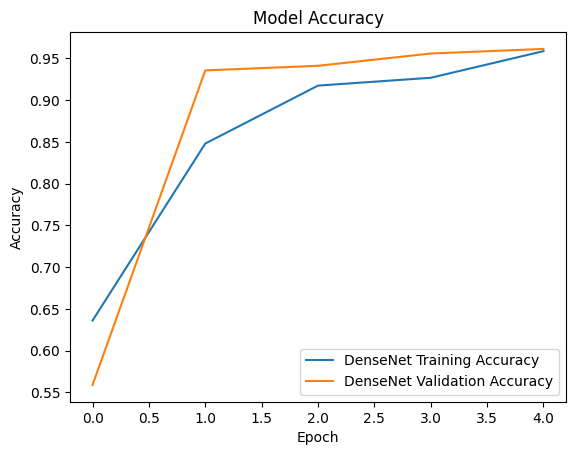

In [ ]:
import matplotlib.pyplot as plt
# Plot accuracy graph
plt.plot(history.history['accuracy'], label='DenseNet Training Accuracy')
plt.plot(history.history['val_accuracy'], label='DenseNet Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


NASNET MODEL

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.nasnet import NASNetMobile, preprocess_input

In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2)  # Using 20% of data for validation

train_generator = train_datagen.flow_from_directory(
    '/content/train',  # Replace with your data path
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    '/content/train',  # Replace with your data path
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

Found 453 images belonging to 2 classes.
Found 112 images belonging to 2 classes.


In [ ]:
base_model = NASNetMobile(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Create the custom head for our network
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),
    Dense(2, activation='softmax')  # Use 'sigmoid' if you have a binary classification
])

model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

19993432/19993432 [==============================] - 0s 0us/step


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=8)

Epoch 1/8
14/14 [==============================] - 86s 4s/step - loss: 0.7002 - accuracy: 0.7126 - val_loss: 0.6995 - val_accuracy: 0.7500
Epoch 2/8
14/14 [==============================] - 53s 4s/step - loss: 0.4208 - accuracy: 0.8337 - val_loss: 0.5501 - val_accuracy: 0.8125
Epoch 3/8
14/14 [==============================] - 53s 4s/step - loss: 0.3585 - accuracy: 0.8415 - val_loss: 0.3482 - val_accuracy: 0.8438
Epoch 4/8
14/14 [==============================] - 51s 3s/step - loss: 0.2757 - accuracy: 0.8907 - val_loss: 0.3550 - val_accuracy: 0.8646
Epoch 5/8
14/14 [==============================] - 52s 4s/step - loss: 0.2875 - accuracy: 0.8955 - val_loss: 0.3717 - val_accuracy: 0.8750
Epoch 6/8
14/14 [==============================] - 49s 4s/step - loss: 0.2344 - accuracy: 0.9097 - val_loss: 0.4436 - val_accuracy: 0.8125
Epoch 7/8
14/14 [==============================] - 51s 4s/step - loss: 0.2541 - accuracy: 0.9050 - val_loss: 0.3696 - val_accuracy: 0.8750
Epoch 8/8
14/14 [==========

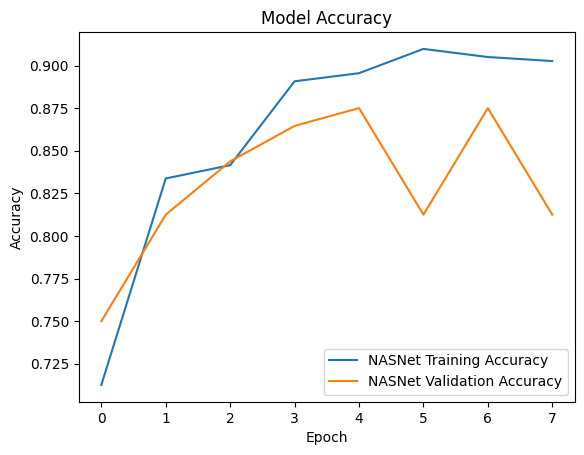

In [ ]:
import matplotlib.pyplot as plt
# Plot accuracy graph
plt.plot(history.history['accuracy'], label='NASNet Training Accuracy')
plt.plot(history.history['val_accuracy'], label='NASNet Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
pip install tensorflow

DENSENET201 Test Model

In [ ]:
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import roc_curve, auc, precision_recall_curve, f1_score, accuracy_score, recall_score, precision_score, confusion_matrix



In [ ]:
# Load the DenseNet201 model pre-trained on ImageNet data
base_model = DenseNet201(weights='imagenet', include_top=False)

# Freeze the base model layers
base_model.trainable = False

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1000, activation='softmax')(x)  # Ensure the last Dense layer has the correct number of classes for your dataset

# Combine the base model with custom classification head
model = Model(inputs=base_model.input, outputs=predictions)

74836368/74836368 [==============================] - 0s 0us/step


In [ ]:
densenet_model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary')  # or 'categorical' if you have more than 2 classes

test_generator = test_datagen.flow_from_directory(
        '/content/test',
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary')  # or 'categorical'

# Compile the model
model.compile(optimizer=Adam(lr=0.001),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Learning Rate Scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)

Found 565 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


In [ ]:
# Train the model
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=test_generator,
                    callbacks=[reduce_lr])

Epoch 1/10
18/18 [==============================] - 202s 11s/step - loss: 1.1238 - accuracy: 0.7257 - val_loss: 0.1807 - val_accuracy: 0.9500 - lr: 0.0010
Epoch 2/10
18/18 [==============================] - 182s 10s/step - loss: 0.3233 - accuracy: 0.8602 - val_loss: 0.1576 - val_accuracy: 0.9571 - lr: 0.0010
Epoch 3/10
18/18 [==============================] - 185s 10s/step - loss: 0.1958 - accuracy: 0.9363 - val_loss: 0.0930 - val_accuracy: 0.9786 - lr: 0.0010
Epoch 4/10
18/18 [==============================] - 187s 10s/step - loss: 0.1803 - accuracy: 0.9363 - val_loss: 0.1058 - val_accuracy: 0.9643 - lr: 0.0010
Epoch 5/10
18/18 [==============================] - 187s 11s/step - loss: 0.1705 - accuracy: 0.9310 - val_loss: 0.0968 - val_accuracy: 0.9643 - lr: 0.0010
Epoch 6/10
18/18 [==============================] - 181s 10s/step - loss: 0.1606 - accuracy: 0.9345 - val_loss: 0.0744 - val_accuracy: 0.9643 - lr: 0.0010
Epoch 7/10
18/18 [==============================] - 180s 10s/step - lo

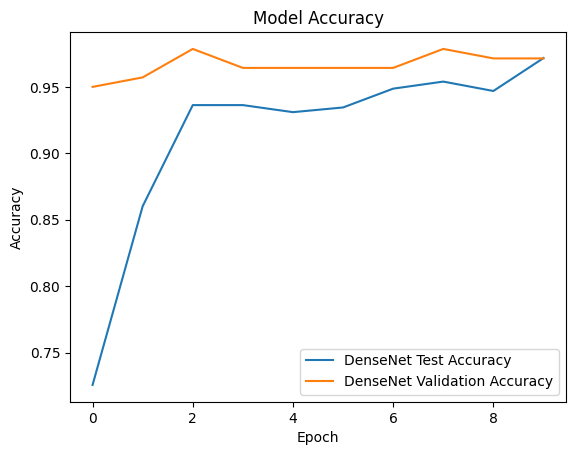

In [ ]:
import matplotlib.pyplot as plt
# Plot accuracy graph
plt.plot(history.history['accuracy'], label='DenseNet Test Accuracy')
plt.plot(history.history['val_accuracy'], label='DenseNet Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define the DenseNet201 model
base_model = DenseNet201(weights='imagenet', include_top=False)

# Freeze the base model layers
base_model.trainable = False

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)  # Binary classification

# Combine the base model with custom classification head
densenet_model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:

# Define function to compile and train the model with fine-tuning and learning rate scheduling
def train_model(model, train_generator, test_generator):
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',  # Use binary cross-entropy for binary classification
                  metrics=['accuracy'])

    # Implement learning rate scheduling
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

    # Train the model
    history = model.fit(train_generator,
                        epochs=20,
                        validation_data=test_generator,
                        callbacks=[reduce_lr])

    return history

In [ ]:
# Train the DenseNet201 model
history_densenet = train_model(densenet_model, train_generator, test_generator)



Epoch 1/20
18/18 [==============================] - 222s 11s/step - loss: 0.5617 - accuracy: 0.7168 - val_loss: 0.3991 - val_accuracy: 0.8571 - lr: 1.0000e-04
Epoch 2/20
18/18 [==============================] - 194s 11s/step - loss: 0.3771 - accuracy: 0.8513 - val_loss: 0.2862 - val_accuracy: 0.9214 - lr: 1.0000e-04
Epoch 3/20
18/18 [==============================] - 192s 11s/step - loss: 0.3230 - accuracy: 0.8743 - val_loss: 0.2407 - val_accuracy: 0.9214 - lr: 1.0000e-04
Epoch 4/20
18/18 [==============================] - 191s 11s/step - loss: 0.2589 - accuracy: 0.9150 - val_loss: 0.1894 - val_accuracy: 0.9429 - lr: 1.0000e-04
Epoch 5/20
18/18 [==============================] - 194s 11s/step - loss: 0.2387 - accuracy: 0.9150 - val_loss: 0.1741 - val_accuracy: 0.9286 - lr: 1.0000e-04
Epoch 6/20
18/18 [==============================] - 189s 11s/step - loss: 0.2178 - accuracy: 0.9292 - val_loss: 0.1630 - val_accuracy: 0.9714 - lr: 1.0000e-04
Epoch 7/20
18/18 [============================

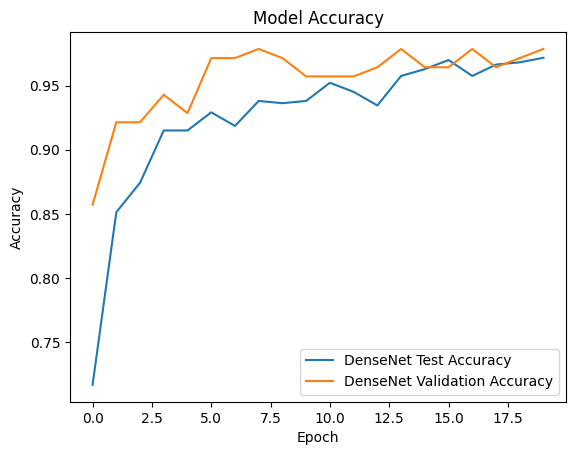

In [ ]:
import matplotlib.pyplot as plt
# Plot accuracy graph
plt.plot(history_densenet.history['accuracy'], label='DenseNet Test Accuracy')
plt.plot(history_densenet.history['val_accuracy'], label='DenseNet Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:

y_true = train_generator
y_pred = test_generator

In [ ]:
from tensorflow.keras.applications import NASNetLarge
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths to your train and test data directories
train_data_dir = '/content/train'
test_data_dir = '/content/test'

# Define image dimensions and batch size
img_width, img_height = 224, 224  # Adjust dimensions as per your model requirements
batch_size = 32

# Define data generators for train and test data
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    shear_range=0.2,  # Apply shear transformation
    zoom_range=0.2,  # Apply zoom transformation
    horizontal_flip=True)  # Flip horizontally

test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale for test data

# Flow training images in batches using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')  # Adjust class_mode as per your classification task (binary or categorical)

# Flow validation images in batches using test_datagen generator
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')  # Adjust class_mode as per your classification task (binary or categorical)


Found 565 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.layers import Input

# Define input tensor with the same shape as the expected input of NASNetLarge
input_tensor = Input(shape=(img_width, img_height, 3))

# Load NASNetLarge model with include_top=False and specify the input tensor
base_model = NASNetLarge(weights='imagenet', include_top=False, input_tensor=input_tensor)


# Freeze the base model layers
base_model.trainable = False

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)  # Binary classification

# Combine the base model with custom classification head
nasnet_model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
nasnet_model.compile(optimizer=Adam(lr=0.001),
                     loss='binary_crossentropy',  # Use binary cross-entropy for binary classification
                     metrics=['accuracy'])

# Train the model (assuming you have defined train_generator and test_generator)
history = nasnet_model.fit(train_generator,
                           epochs=10,
                           validation_data=test_generator)

test_loss, test_accuracy = nasnet_model.evaluate(test_generator)

Epoch 1/10
18/18 [==============================] - 396s 21s/step - loss: 0.4769 - accuracy: 0.8035 - val_loss: 0.2226 - val_accuracy: 0.9071
Epoch 2/10
18/18 [==============================] - 350s 20s/step - loss: 0.2899 - accuracy: 0.8708 - val_loss: 0.2254 - val_accuracy: 0.9071
Epoch 3/10
18/18 [==============================] - 349s 20s/step - loss: 0.2123 - accuracy: 0.9115 - val_loss: 0.1921 - val_accuracy: 0.9357
Epoch 4/10
18/18 [==============================] - 362s 20s/step - loss: 0.1811 - accuracy: 0.9292 - val_loss: 0.1770 - val_accuracy: 0.9500
Epoch 5/10
18/18 [==============================] - 361s 20s/step - loss: 0.1817 - accuracy: 0.9257 - val_loss: 0.1717 - val_accuracy: 0.9357
Epoch 6/10
18/18 [==============================] - 368s 21s/step - loss: 0.1727 - accuracy: 0.9292 - val_loss: 0.1589 - val_accuracy: 0.9357
Epoch 7/10
18/18 [==============================] - 361s 20s/step - loss: 0.1574 - accuracy: 0.9381 - val_loss: 0.1991 - val_accuracy: 0.9286
Epoch 

In [ ]:
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9285714030265808


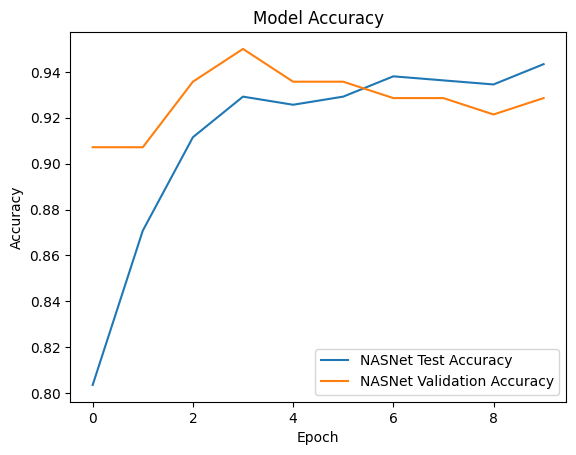

In [ ]:
import matplotlib.pyplot as plt
# Plot accuracy graph
plt.plot(history.history['accuracy'], label='NASNet Test Accuracy')
plt.plot(history.history['val_accuracy'], label='NASNet Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.layers import Input

# Define input tensor with the same shape as the expected input of NASNetLarge
input_tensor = Input(shape=(img_width, img_height, 3))

# Load NASNetLarge model with include_top=False and specify the input tensor
base_model = NASNetLarge(weights='imagenet', include_top=False, input_tensor=input_tensor)


# Freeze the base model layers
base_model.trainable = False

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)  # Binary classification

# Combine the base model with custom classification head
nasnet_model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
nasnet_model.compile(optimizer=Adam(lr=0.001),
                     loss='binary_crossentropy',  # Use binary cross-entropy for binary classification
                     metrics=['accuracy'])

# Train the model (assuming you have defined train_generator and test_generator)
history = nasnet_model.fit(train_generator,
                           epochs=10,
                           validation_data=test_generator)

test_loss, test_accuracy = nasnet_model.evaluate(test_generator)

Epoch 1/10
18/18 [==============================] - 396s 21s/step - loss: 0.4769 - accuracy: 0.8035 - val_loss: 0.2226 - val_accuracy: 0.9071
Epoch 2/10
18/18 [==============================] - 350s 20s/step - loss: 0.2899 - accuracy: 0.8708 - val_loss: 0.2254 - val_accuracy: 0.9071
Epoch 3/10
18/18 [==============================] - 349s 20s/step - loss: 0.2123 - accuracy: 0.9115 - val_loss: 0.1921 - val_accuracy: 0.9357
Epoch 4/10
18/18 [==============================] - 362s 20s/step - loss: 0.1811 - accuracy: 0.9292 - val_loss: 0.1770 - val_accuracy: 0.9500
Epoch 5/10
18/18 [==============================] - 361s 20s/step - loss: 0.1817 - accuracy: 0.9257 - val_loss: 0.1717 - val_accuracy: 0.9357
Epoch 6/10
18/18 [==============================] - 368s 21s/step - loss: 0.1727 - accuracy: 0.9292 - val_loss: 0.1589 - val_accuracy: 0.9357
Epoch 7/10
18/18 [==============================] - 361s 20s/step - loss: 0.1574 - accuracy: 0.9381 - val_loss: 0.1991 - val_accuracy: 0.9286
Epoch 

In [ ]:
# Assuming y_true and y_pred are the true labels and predicted labels respectively
y_true = train_generator
y_pred = test_generator

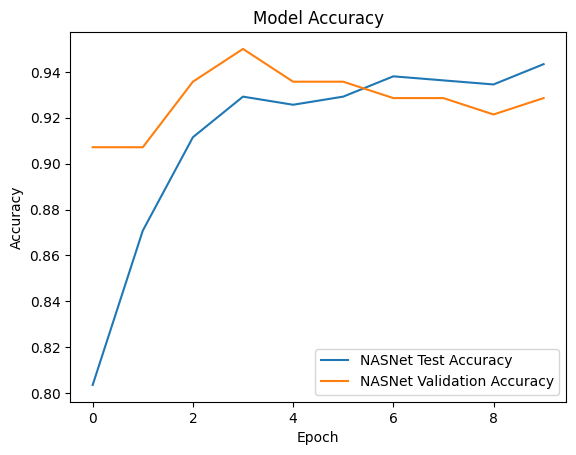

In [ ]:
import matplotlib.pyplot as plt
# Plot accuracy graph
plt.plot(history.history['accuracy'], label='NASNet Test Accuracy')
plt.plot(history.history['val_accuracy'], label='NASNet Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

DenseNet201 Performance Metrics

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,specificity_score
import numpy as np


# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Calculate precision
precision = precision_score(y_true, y_pred)

# Calculate recall
recall = recall_score(y_true, y_pred)

# Calculate F1-score
f1 = f1_score(y_true, y_pred)

# calculate specificity
specificity = specificity_score(y_true, y_pred)


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Specificity:",specificity)


Accuracy: 0.8571428571428571
Precision: 1.0
Recall: 0.8333333333333334
F1-score: 0.9090909090909091


NASNET MODEL PERFORMANCE METRICS

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Calculate precision
precision = precision_score(y_true, y_pred)

# Calculate recall
recall = recall_score(y_true, y_pred)

# Calculate F1-score
f1 = f1_score(y_true, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.8571428571428571
Precision: 1.0
Recall: 0.8
F1-score: 0.888888888888889


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths to your data directories
train_dir = '/content/drive/MyDrive/glaucoma detection using deep learning/train'
test_dir = '/content/drive/MyDrive/glaucoma detection using deep learning/test'

# Preprocessing the data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# This will reduce memory consumption
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary')


Found 565 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras import layers
from tensorflow.keras.models import Model

# Load DenseNet201 with pre-trained ImageNet weights
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base_model
base_model.trainable = False

# Add custom layers
x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(1, activation='sigmoid')(x)

# This is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples // train_generator.batch_size,
      epochs=10
)

# Extract train accuracy from history
train_accuracy = history.history['accuracy'][-1]

print(f'Train Accuracy: {train_accuracy}')


Epoch 1/10
17/17 [==============================] - 26s 481ms/step - loss: 0.5067 - accuracy: 0.7561
Epoch 2/10
17/17 [==============================] - 10s 543ms/step - loss: 0.2962 - accuracy: 0.8824
Epoch 3/10
17/17 [==============================] - 10s 565ms/step - loss: 0.2016 - accuracy: 0.9325
Epoch 4/10
17/17 [==============================] - 10s 568ms/step - loss: 0.1925 - accuracy: 0.9193
Epoch 5/10
17/17 [==============================] - 8s 488ms/step - loss: 0.1730 - accuracy: 0.9418
Epoch 6/10
17/17 [==============================] - 8s 482ms/step - loss: 0.1501 - accuracy: 0.9400
Epoch 7/10
17/17 [==============================] - 10s 540ms/step - loss: 0.1313 - accuracy: 0.9550
Epoch 8/10
17/17 [==============================] - 10s 561ms/step - loss: 0.1327 - accuracy: 0.9568
Epoch 9/10
17/17 [==============================] - 10s 559ms/step - loss: 0.1042 - accuracy: 0.9587
Epoch 10/10
17/17 [==============================] - 8s 489ms/step - loss: 0.1060 - accuracy:

In [ ]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

5/5 [==============================] - 5s 152ms/step - loss: 0.0814 - accuracy: 0.9643
Test Loss: 0.08140894770622253, Test Accuracy: 0.9642857313156128


In [ ]:
# Save the model
model.save('glaucoma_detection_model.h5')


In [ ]:
import os

train_glaucoma_dir = '/content/drive/MyDrive/glaucoma detection using deep learning/train/Glaucoma'
train_non_glaucoma_dir = '/content/drive/MyDrive/glaucoma detection using deep learning/train/Non Glaucoma'
test_glaucoma_dir = '/content/drive/MyDrive/glaucoma detection using deep learning/test/Glaucoma'
test_non_glaucoma_dir = '/content/drive/MyDrive/glaucoma detection using deep learning/test/Non Glaucoma'

# Count the number of images in each directory
num_train_glaucoma = len(os.listdir(train_glaucoma_dir))
num_train_non_glaucoma = len(os.listdir(train_non_glaucoma_dir))
num_test_glaucoma = len(os.listdir(test_glaucoma_dir))
num_test_non_glaucoma = len(os.listdir(test_non_glaucoma_dir))

print(f"Train Glaucoma images: {num_train_glaucoma}")
print(f"Train Non-Glaucoma images: {num_train_non_glaucoma}")
print(f"Test Glaucoma images: {num_test_glaucoma}")
print(f"Test Non-Glaucoma images: {num_test_non_glaucoma}")


Train Glaucoma images: 326
Train Non-Glaucoma images: 239
Test Glaucoma images: 70
Test Non-Glaucoma images: 70


In [ ]:
import tensorflow as tf

# Load the pre-trained model
model = tf.keras.models.load_model('glaucoma_detection_model.h5')

# Display model summary
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d_2 (ZeroPadd  (None, 230, 230, 3)          0         ['input_2[0][0]']             
 ing2D)                                                                                           
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d_2[0][0]']    
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1/conv[0][0]']    

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.416634 to fit



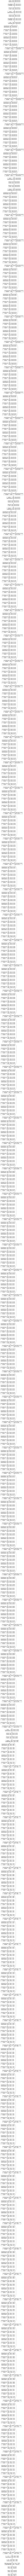

In [ ]:
import tensorflow as tf

# Load the pre-trained model
model = tf.keras.models.load_model('glaucoma_detection_model.h5')

# Visualize model architecture
tf.keras.utils.plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


GLAUCOMA DETECTION

1/1 [==============================] - 4s 4s/step
Detection: Non-Glaucoma


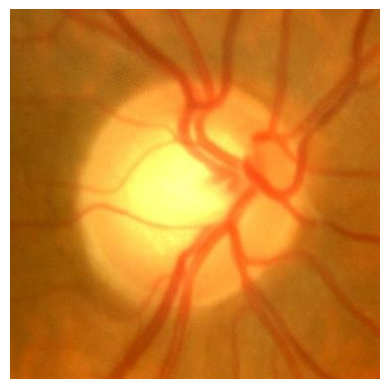

In [ ]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

# Load the pre-trained model
model = tf.keras.models.load_model('glaucoma_detection_model.h5')

# Function to preprocess an image
def preprocess_image(image_path):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, axis=0)
    return img_array

# Function to detect glaucoma in an image
def detect_image(image_path, threshold=0.5):
    img_array = preprocess_image(image_path)
    # Normalize the image
    img_array = img_array / 255.0
    # Make a detection
    detection = model.predict(img_array)
    # Check if detection exceeds the threshold for glaucoma detection
    detected_class = "Glaucoma " if detection[0][0] < threshold else "Non-Glaucoma"
    return detected_class

# Function to show the image
def show_image(image_path):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

# Example usage of the detection function
image_path = '/content/drive/MyDrive/glaucoma detection using deep learning/test/Non Glaucoma/Im016_ACRIMA.jpg'
detection = detect_image(image_path)
print(f'Detection: {detection}')
# Example usage of the show_image function
show_image(image_path)
